### Dataset

* Souce: https://www.kaggle.com/datasets/einsteindata4u/covid19

This dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, at São Paulo, Brazil, and who had samples collected to perform the SARS-CoV-2 RT-PCR and additional laboratory tests during a visit to the hospital.

All data were anonymized following the best international practices and recommendations. All clinical data were standardized to have a mean of zero and a unit standard deviation.


Task Details
#### TASK 1
Predict confirmed COVID-19 cases among suspected cases.
Based on the results of laboratory tests commonly collected for a suspected COVID-19 case during a visit to the emergency room, would it be possible to predict the test result for SARS-Cov-2 (positive/negative)?

#### TASK 2
Predict admission to general ward, semi-intensive unit or intensive care unit among confirmed COVID-19 cases.
Based on the results of laboratory tests commonly collected among confirmed COVID-19 cases during a visit to the emergency room, would it be possible to predict which patients will need to be admitted to a general ward, semi-intensive unit or intensive care unit?

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = './covid_sp_dataset.xlsx'

data = pd.read_excel(DATA_PATH)

print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns.\n')
total_na_percentage = data.isna().sum().sum() / (data.shape[0] * data.shape[1]) * 100

print(f'The percentage of missing values in each column is: {total_na_percentage:.1f}%')


The data has 5644 rows and 111 columns.

The percentage of missing values in each column is: 88.1%


### Data Cleaning

* Remove all rows without basic information (using Hemoglobin count as metric)
* Remove all atributes that have mostly missing entrys
* Transform categorical classes into numeric classes 
* Apply 0.5 to all missing information on binary classes
* Apply mean values to all interval interval numeric classes - (**maybe we should try other approachs to this**)

In [79]:
data.drop_duplicates(inplace=True)

data.dropna(inplace=True, subset=['Hemoglobin'])
data.dropna(inplace=True, axis=1, subset=[1])

data.replace(to_replace='not_detected', value=0, inplace=True)
data.replace(to_replace='detected', value=1, inplace=True)
data.replace(to_replace='negative', value=0, inplace=True)
data.replace(to_replace='positive', value=1, inplace=True)

data.drop(['Influenza A, rapid test', 'Influenza B, rapid test', 'Serum Glucose'], axis=1, inplace=True)

bin_atributes = ['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1',
                'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3',
                'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E',
                'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2']

for col_name, col in data.items():
    if col_name in bin_atributes:
        col.fillna(0.5, inplace=True) 
    elif col.hasnans == True:
        col.fillna(col.mean(skipna=True), inplace=True)

patient_admition = data['Patient addmited to semi-intensive unit (1=yes, 0=no)'] * 2 + data['Patient addmited to intensive care unit (1=yes, 0=no)'] *3 + data['Patient addmited to regular ward (1=yes, 0=no)']
data.insert(3, 'Patient admition', patient_admition)
data.drop(['Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)', 'Patient addmited to regular ward (1=yes, 0=no)'], axis=1, inplace=True)

data.reset_index(inplace=True, drop=True)

print(f"The data has {data.shape[0]} rows and {data.shape[1]} columns after cleaning.\n")

# for i, col in enumerate(data.columns):
#     print(f"{i}: {col}")

print(f"The data have the following format:")
data.to_csv('./covid_sp_dataset_treated.csv', index=True)
data.head()

The data has 603 rows and 41 columns after cleaning.

The data have the following format:


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient admition,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium
0,126e9dd13932f68,17,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,...,0.0,0.0,0.0,0.0,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512
1,8bb9d64f0215244,1,0,2,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,...,0.0,0.0,0.0,0.0,-0.127395,-0.067309,-0.286986,-1.838623,0.930020,0.503132
2,6c9d3323975b082,9,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,...,1.0,0.0,0.0,0.0,0.880570,-0.811643,0.003367,-0.908177,0.435697,-0.215628
3,d3ea751f3db9de9,11,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,...,0.0,0.0,0.0,0.0,0.265957,0.000922,-0.487674,0.004102,-0.001846,0.001172
4,2c2eae16c12a18a,9,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,...,0.5,0.5,0.5,0.5,-0.422410,-1.332677,0.003367,-0.908177,-0.552949,-0.575008


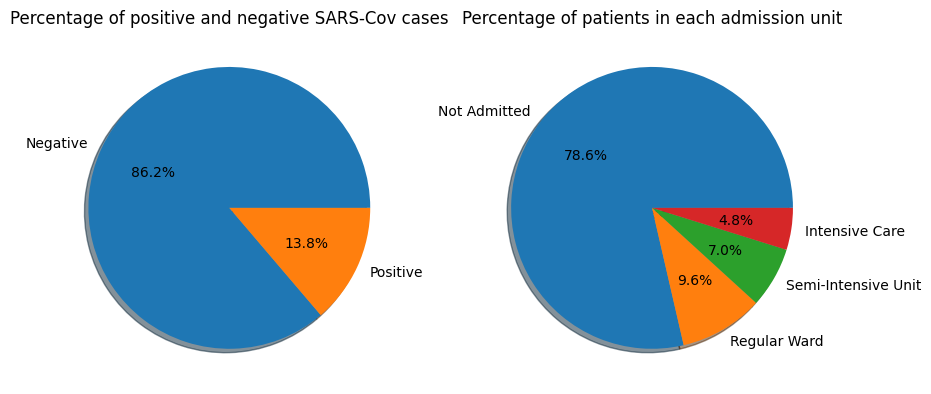

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

labels = ['Negative', 'Positive']
sizes = [data['SARS-Cov-2 exam result'].value_counts()[0], data['SARS-Cov-2 exam result'].value_counts()[1]]
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
axes[0].set_title('Percentage of positive and negative SARS-Cov cases')

labels = ['Not Admitted', 'Regular Ward', 'Semi-Intensive Unit', 'Intensive Care']
sizes = [data['Patient admition'].value_counts()[0], data['Patient admition'].value_counts()[1], data['Patient admition'].value_counts()[2], data['Patient admition'].value_counts()[3]]
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
axes[1].set_title('Percentage of patients in each admission unit')


plt.show()


Organize the data